# Ex. 03 - Pricing di opzioni europee Call e Put

In questo esercizio è stato calcolato - con metodi numerici MC - il prezzo di opzioni europee (Call e Put). Nel 1973 Black e Scholes hanno modelizzato l'andamento del prezzo $S(t)$ dell'asset sottostante un'opzione in funzione del tempo $t$ attraverso un moto Brownionano geometrico $GBM(\mu,\sigma)$, ovvero un processo stocastico descritto dalla seguente equazione differenziale stocastica (SDE):
$$d\ln S(t)= (\mu-\frac{1}{2}\sigma^2)dt + \sigma dW(t)\hspace{2.5cm}(1)$$

dove $dW$ è un processo di Wiener e quindi con distrbuzione $\sim \mathcal{N}(0,\sqrt{dt})$

La soluzione analitica è:
$$S(t) = S(0) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)t+\sigma W(t)\right] \hspace{2.5cm}(2)$$

Assegnati il prezzo iniziale dell'asset $S(0)$, il tempo $T$ di "scadenza" dell'opzione, i parametri drift $\mu$ e volatilità $\sigma$ e lo $\textit{strike price}$ $K$ a cui l'$\textit holder$ può comprare (call) / vendere (put) l'asset al tempo $T$, l'obiettivo è stimare il profitto medio $p_{call}$ e $p_{put}$ dell'$\textit holder$ al fine di stabilire il prezzo dell'opzione. I prezzi $P_{call}$ e $P_{put}$ delle opzioni si esprimono nel modo seguente:

- $P_{put}=e^{-rT}\cdot p_{put}=e^{-rT}\langle max[0,K-S(T)]\rangle \hspace{2.5cm}(3)$

- $P_{call}=e^{-rT}\cdot p_{call}=e^{-rT}\langle max[0,S(T)-K]\rangle$

dove $r$ rappresenta il tasso di interesse di una banca che farebbe aumentare un eventuale deposito di un fattore $e^{rT}$ nel tempo $T$.
Il problema è stato risolto analiticamente da Black e Scholes ed è quindi possibile esprimere $P_{put}$ e $P_{call}$ per qualsiasi tempo $t<T$. In alternativa, è possibile stimare il valor medio $\langle...\rangle$ che compare nelle $(3)$ con metodi numerici MC, ovvero campionando il $GBM(\mu,\sigma)$ per generarne un grande numero di realizzazioni. In particolare, è possibile:

- campionare direttamente il prezzo finale dell'asset $S(T)$, dato che esiste un'espressione analitica in funzione del tempo per quest'ultimo.
- campionare gli incrementi $\Delta S$ del prezzo dell'asset per ogni incremento $\Delta t$ del tempo in cui viene suddiviso l'intervallo [0,T]. In questo modo il prezzo viene calcolato in maniera ricorsiva:
$$S(t_{i+1}) = S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma(W_{i+1}-W_i)\right]=S(t_i) \exp\left[ \left(\mu-\frac{1}{2}\sigma^2\right)(t_{i+1}-t_i)
    +\sigma Z_{i+1}\sqrt{t_{i+1}-t_i}\right]$$
dove gli incrementi $\Delta W\sim \mathcal{N}(0,\sqrt{\Delta t})$ e $Z_i \sim \mathcal{N}(0,1)$



Quest'ultimo metodo risulta applicabile anche nei casi in cui non esiste una soluzione analitica per esprimere il prezzo dell'asset (perchè ad esempio il mercato non è realmente efficiente) oppure se si considerano opzioni diverse da quelle europee.

L'esercizio è stato svolto utilizzando i seguenti parametri:
- asset price a $t=0$: $S(0)=100$
- delivery time: $T=1$
- strike price: $K=100$
- risk-free interest rate: $\mu = r =0.1$
- volatility: $\sigma=0.25$

### Soluzione analitica di Black-Scholes

Mostriamo la soluzione analitica di Black e Scholes per i parametri utilizzati nell'esercizio in modo da poter verificare i risultati delle simulazioni.

In [2]:
import scipy
from scipy.special import erf
from scipy import log, exp, sqrt

# data
S0 = 100.
K = 100.
T = 1.
r = 0.1
sigma = 0.25
t=0

def N(x):
    return 0.5 * (1. + erf(x / sqrt(2.)))

def black_scholes(S0, K, T, r, sigma):
    d1 = 1./(sigma * sqrt(T)) * (log(S0 / K) + (r + (sigma**2) / 2.) * T)
    d2 = d1 - sigma * sqrt(T)
    C = S0 * N(d1) - K * exp(-r * T) * N(d2)
    P = S0 *(N(d1) - 1.) - K * exp(-r * T) * (N(d2)-1.)
    return C, P

if __name__ == "__main__":
    call_BS, put_BS = black_scholes(S0, K, T, r, sigma)
    print(" == BLACK-SCHOLES ==")
    print("call: ", call_BS)
    print("put: ", put_BS)

 == BLACK-SCHOLES ==
call:  14.975790778311286
put:  5.4595325819072364


### Stima diretta del prezzo dell'asset $S(T)$
Il prezzo delle opzioni è stato calcolato in modo diretto generando $M=10^4$ prezzi $S(T)$ dell'asset in $N=100$ blocchi. Di seguito si mostrano i grafici delle stime dei prezzi delle opzioni call e put - con relative incertezze statistiche - in funzione del numero di blocchi.

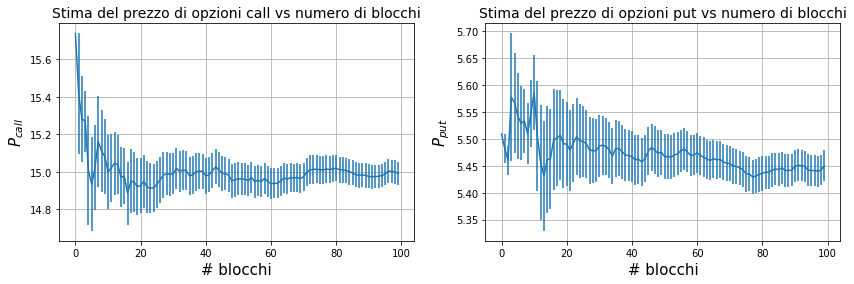

SAMPLING DIRETTO DEL PREZZO FINALE 

CALL OPTIONS
Miglior stima del prezzo:  14.99 +/- 0.06
Soluzione analitica di Black-Scholes:  14.975790778311286 

PUT OPTIONS
Miglior stima del prezzo:  5.45 +/- 0.03
Soluzione analitica di Black-Scholes:  5.4595325819072364


In [3]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math
import decimal

# Caricamento da file "Direct.txt" di prezzo call, err call, prezzo put, err put in funzione del numero di blocchi
call, err_call, put, err_put = np.loadtxt("Output/Direct.txt", usecols=(0,1,2,3), delimiter = ' ', unpack = 'true')
N = len(call)
x = np.arange(N)

# Grafici stime dirette
f=plt.figure(figsize=(14,4))

f.add_subplot(1,2,1)
plt.errorbar(x,call,yerr=err_call)
plt.xlabel('# blocchi',size=15)
plt.ylabel('$P_{call}$',size=15)
plt.title('Stima del prezzo di opzioni call vs numero di blocchi',size=14)
plt.grid(True)

f.add_subplot(1,2,2)
plt.errorbar(x,put,yerr=err_put)
plt.xlabel('# blocchi',size=15)
plt.ylabel('$P_{put}$',size=15)
plt.title('Stima del prezzo di opzioni put vs numero di blocchi',size=14)
plt.grid(True)
plt.show()

print('SAMPLING DIRETTO DEL PREZZO FINALE \n')

print('CALL OPTIONS')
print("Miglior stima del prezzo: ",round(call[N-1],2),"+/-",round(err_call[N-1],2))
print("Soluzione analitica di Black-Scholes: ",call_BS,'\n')

print('PUT OPTIONS')
print("Miglior stima del prezzo: ",round(put[N-1],2),"+/-",round(err_put[N-1],2))
print("Soluzione analitica di Black-Scholes: ",put_BS)

I risultati delle simulazioni sono in pieno accordo con i valori teorici.

###  Campionamento a tempo discreto del prezzo dell'asset $S(T)$

In questo caso il prezzo $S(T)$ è stato stimato in maniera ricorsiva suddividendo l'intervallo temporale $[0,T]$ in $N_{step}=100$ sottointervalli e calcolando il prezzo $S_{i+1}$ al tempo $t_{i+1}$ in funzione di $S_i$ al tempo $t_i$. In questo caso il metodo non introduce approssimazioni, e quindi ci si aspetta che i risultati coincidano - in termini statistici - con quelli trovati nell'esercizio precedente. 
In questo modo sono state simulate $M=10^4$ realizzazioni del cammino del prezzo dell'asset nell'intervallo $[0,T]$, suddivise in $N=100$ blocchi. Di seguito si mostrano i grafici delle stime dei prezzi delle opzioni call e put - con relative incertezze statistiche - in funzione del numero di blocchi.

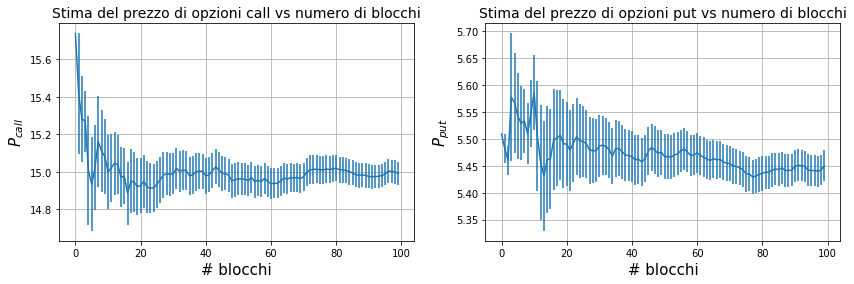

SAMPLING A TEMPO DISCRETO DEL PREZZO 

CALL OPTIONS
Miglior stima del prezzo:  14.99 +/- 0.06
Soluzione analitica di Black-Scholes:  14.975790778311286 

PUT OPTIONS
Miglior stima del prezzo:  5.45 +/- 0.03
Soluzione analitica di Black-Scholes:  5.4595325819072364


In [4]:
# Caricamento da file "Discrete.txt" di prezzo call, err call, prezzo put, err put in funzione del numero di blocchi
call, err_call, put, err_put = np.loadtxt("Output/Direct.txt", usecols=(0,1,2,3), delimiter = ' ', unpack = 'true')
N = len(call)
x = np.arange(N)

# Grafici stime metodo discreto
f=plt.figure(figsize=(14,4))

f.add_subplot(1,2,1)
plt.errorbar(x,call,yerr=err_call)
plt.xlabel('# blocchi',size=15)
plt.ylabel('$P_{call}$',size=15)
plt.title('Stima del prezzo di opzioni call vs numero di blocchi',size=14)
plt.grid(True)

f.add_subplot(1,2,2)
plt.errorbar(x,put,yerr=err_put)
plt.xlabel('# blocchi',size=15)
plt.ylabel('$P_{put}$',size=15)
plt.title('Stima del prezzo di opzioni put vs numero di blocchi',size=14)
plt.grid(True)
plt.show()

print('SAMPLING A TEMPO DISCRETO DEL PREZZO \n')

print('CALL OPTIONS')
print("Miglior stima del prezzo: ",round(call[N-1],2),"+/-",round(err_call[N-1],2))
print("Soluzione analitica di Black-Scholes: ",call_BS,'\n')

print('PUT OPTIONS')
print("Miglior stima del prezzo: ",round(put[N-1],2),"+/-",round(err_put[N-1],2))
print("Soluzione analitica di Black-Scholes: ",put_BS)

Anche in questo caso i risultati delle simulazioni sono in accordo con quelli teorici di Black e Scholes.